# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.3 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #print('Actions looks like: ', actions)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        #print('Rewards looks like: ', rewards)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

env_info = env.reset(train_mode=True)[brain_name]

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agentPinky = Agent(state_size=state_size, action_size= action_size, random_seed=0)
agentBrain = Agent(state_size=state_size, action_size= action_size, random_seed=1)

agents=[agentPinky,agentBrain]
#agents=[agentPinky]

Episode 100	Avg score1:-0.00530 	Avg score2: 0.00130 	Average Max Score: 0.00570
Episode 200	Avg score1:-0.00280 	Avg score2: 0.01680 	Average Max Score: 0.02100
Episode 300	Avg score1:0.00690 	Avg score2: 0.01610 	Average Max Score: 0.02850
Episode 400	Avg score1:-0.00230 	Avg score2: 0.04030 	Average Max Score: 0.04400
Episode 500	Avg score1:0.02520 	Avg score2: 0.05680 	Average Max Score: 0.07670
Episode 600	Avg score1:0.06980 	Avg score2: 0.06720 	Average Max Score: 0.11040
Episode 700	Avg score1:0.09060 	Avg score2: 0.10530 	Average Max Score: 0.13350
Episode 800	Avg score1:0.13000 	Avg score2: 0.13700 	Average Max Score: 0.17130
Episode 900	Avg score1:0.30610 	Avg score2: 0.28690 	Average Max Score: 0.33130
Environment solved!
Episode 932	Avg score1:0.47800 	Avg score2: 0.46230 	Average Max Score: 0.50530

Environment solved in 832 episodes!	Ended in episode: 932


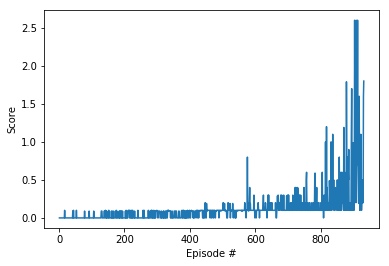

In [8]:
def ddpg(n_episodes=10000, max_t=5000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores_deque1 = deque(maxlen=print_every)
    scores_deque2 = deque(maxlen=print_every)
    scores=[]

    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        ma_state=env_info.vector_observations
        for agent in agents:  
            agent.reset()
            
        score = 0
        ma_score = np.zeros(num_agents) 

        #for t in range(max_t):
        while True:    
              
            action1 = agentPinky.act(ma_state[0])  
            
            action2 = agentBrain.act(ma_state[1])          
            #action2 = agentPinky.act(ma_state[1])
                                      
            ma_action=[action1,action2]        
            env_info = env.step(ma_action)[brain_name]
         
            ma_next_state = env_info.vector_observations   # get the next state
            
            #ma_next_state =  np.reshape(env_info.vector_observations, (1,state_size))  # get the next state
            
            
            ma_reward = env_info.rewards                   # get the reward
            ma_done = env_info.local_done                  # see if episode has finished               

            agentPinky.step(ma_state[0], action1, ma_reward[0], ma_next_state[0], ma_done[0] )
            
            #agentPinky.step(ma_state[1], action2, ma_reward[1], ma_next_state[1], ma_done[1] )            
            agentBrain.step(ma_state[1], action2, ma_reward[1], ma_next_state[1], ma_done[1])            
            
            
            ma_score[0] += ma_reward[0]
            ma_score[1] += ma_reward[1]
            
            ma_state = ma_next_state          

            
            
            if any(ma_done):
                break 
        #print(ma_score,' ',ma_score[0],' ',ma_score[1],' ',max(ma_score))
        score=max(ma_score)        
        scores_deque.append(score)
        scores_deque1.append(ma_score[0])
        scores_deque2.append(ma_score[1])
        scores.append(score)
        if i_episode % print_every == 0:
            #print('Actions: ', ma_action) 
            print('\rEpisode {}\tAvg score1:{:.5f} \tAvg score2: {:.5f} \tAverage Max Score: {:.5f}'.format(i_episode,np.mean(scores_deque1),np.mean(scores_deque2), np.mean(scores_deque)), end="\n")

        if np.mean(scores_deque)>=0.5:
            print('Environment solved!')
            print('\rEpisode {}\tAvg score1:{:.5f} \tAvg score2: {:.5f} \tAverage Max Score: {:.5f}'.format(i_episode,np.mean(scores_deque1),np.mean(scores_deque2), np.mean(scores_deque)), end="\n")
            print('\nEnvironment solved in {:d} episodes!\tEnded in episode: {:d}'.format(i_episode-100,i_episode ))

            torch.save(agentPinky.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agentPinky.critic_local.state_dict(), 'checkpoint_critic1.pth')
            
            torch.save(agentBrain.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agentBrain.critic_local.state_dict(), 'checkpoint_critic2.pth')
            
            break    
            
    return scores

from workspace_utils import active_session
with active_session():  
    scores = ddpg()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [9]:
env.close()
